In [1]:
#Data visualizing and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
#Traning Testing and Spliting Data
from sklearn.model_selection import train_test_split
#for label encoding 
from sklearn.preprocessing import LabelEncoder
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
#for SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
#Using Cross Validation
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('./Dataset/voice.csv')
df.shape

(3168, 21)

In [3]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['label'] = enc.fit_transform(df['label'].astype('str'))

In [4]:
X = df.drop('label', axis=1)
y = df['label']

In [5]:
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

In [6]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


<Axes: >

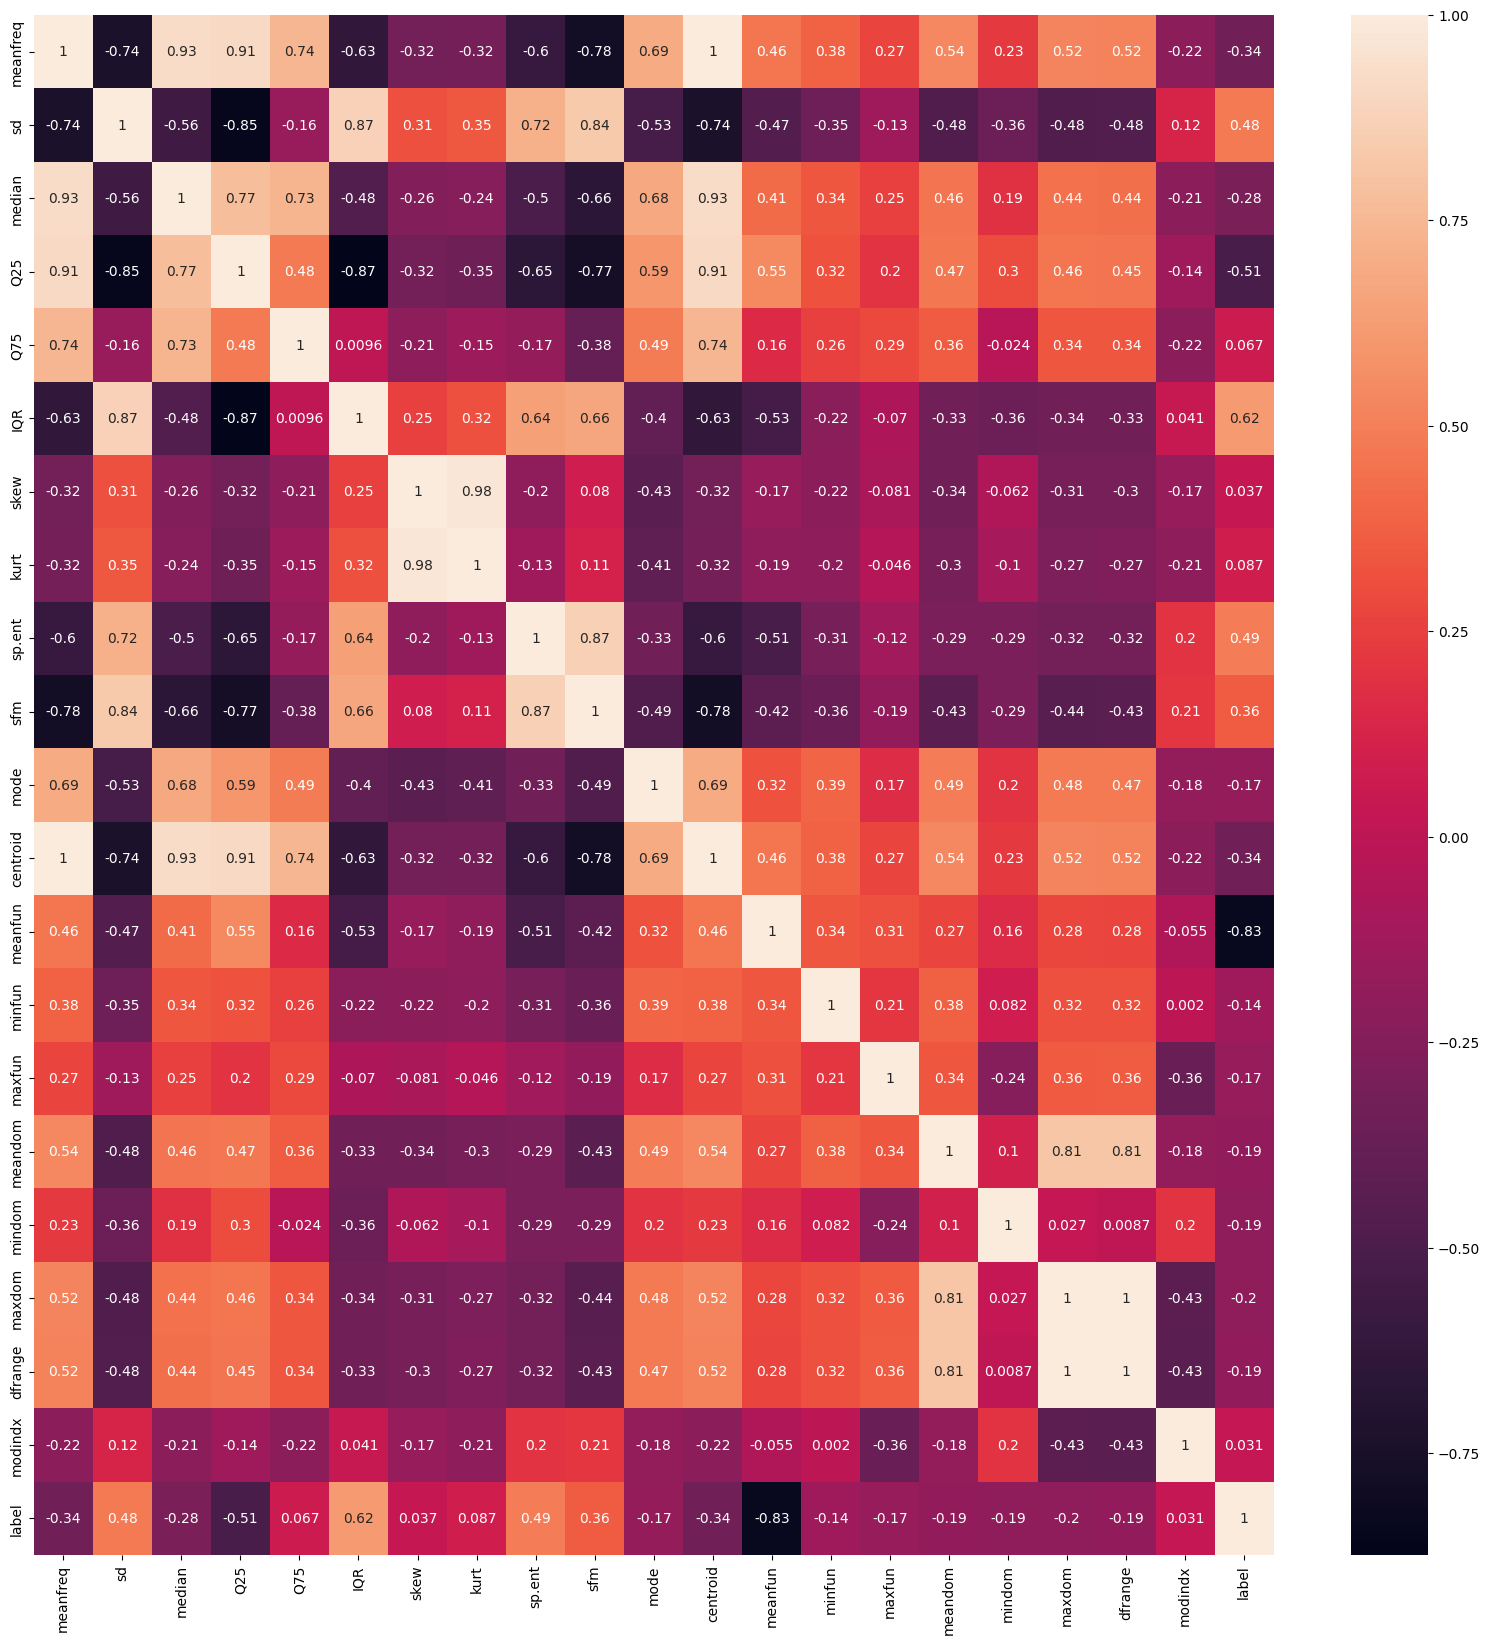

In [11]:
plt.figure(figsize=(20,20))
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

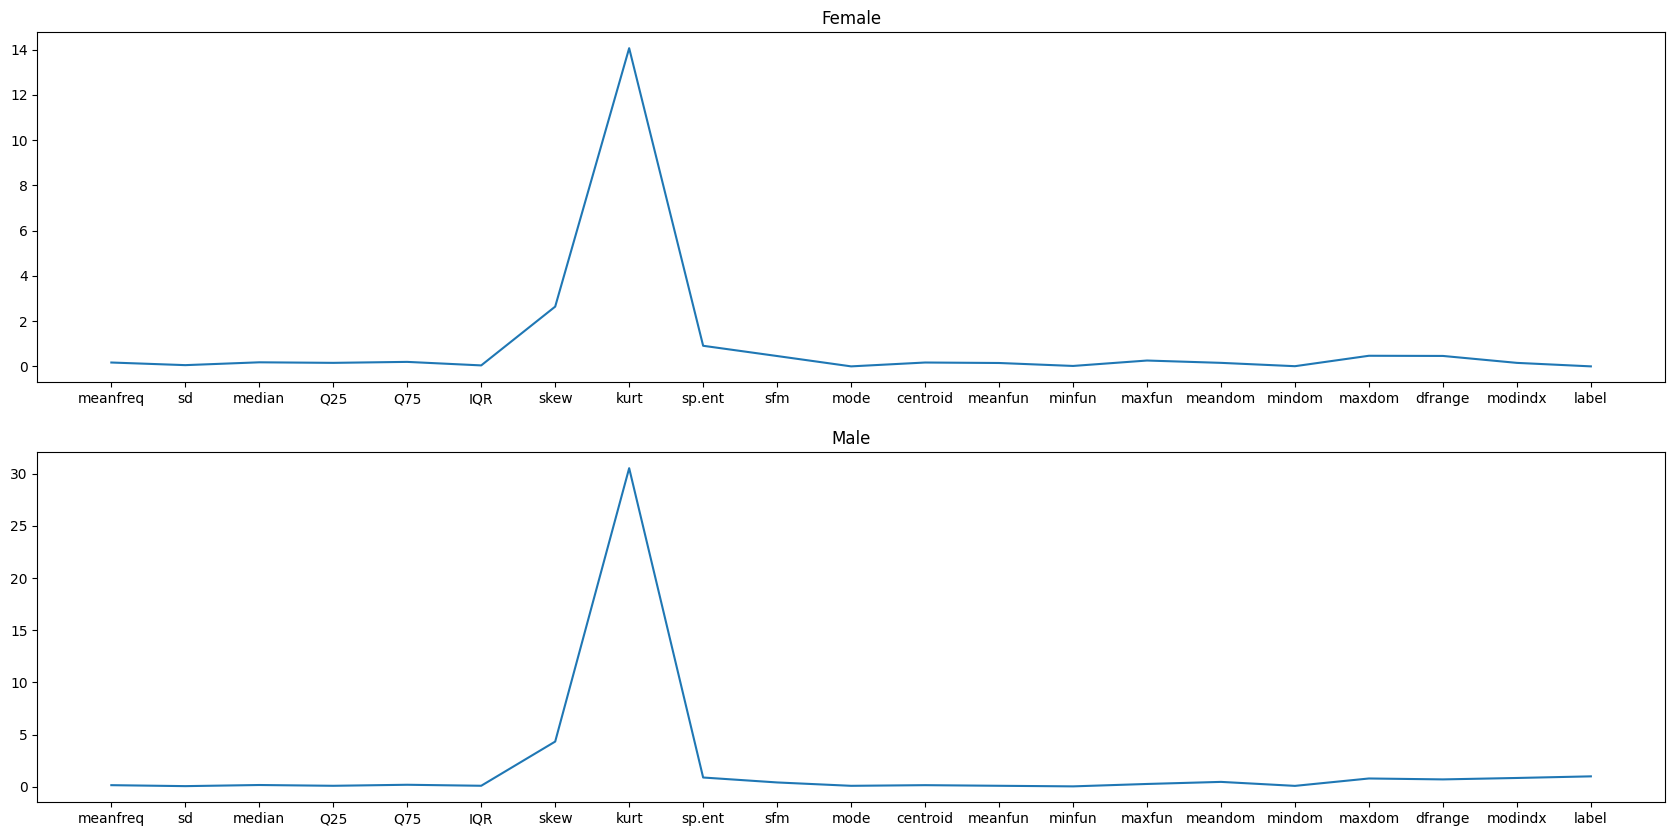

In [13]:
index = 0
label = ['Female', 'Male']

# fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(21,10))

# for i in range(3):
#     ax[i].plot(df[df['label'] == i].sample(1).iloc[0,:21])
#     ax[i].set_title(label[i])
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(21, 10))

for i in range(2):  # Lặp qua 2 giá trị: 0 và 1
    ax[i].plot(df[df['label'] == i].sample(1).iloc[0, :21])
    ax[i].set_title(label[i])

plt.show()

In [14]:
# Simple Function to get the name of top most corelated attributes

def get_corelated_col(cor_dat, threshold): 
    # Cor_data to be column along which corelation to be measured 
    #Threshold be the value above wich of corelation to considered
    feature=[]
    value=[]

    for i ,index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) > threshold:
            feature.append(index)
            value.append(cor_dat[index])

    df_corr = pd.DataFrame(data = value, index = feature, columns=['corr value'])
    return df_corr

In [15]:
cormap = df.corr()
top_corelated_values = get_corelated_col(cormap['label'], 0.40)
top_corelated_values

,corr value
sd,0.479539
Q25,-0.511455
IQR,0.618916
sp.ent,0.490552
meanfun,-0.833921
label,1.000000


<Figure size 2000x2000 with 0 Axes>

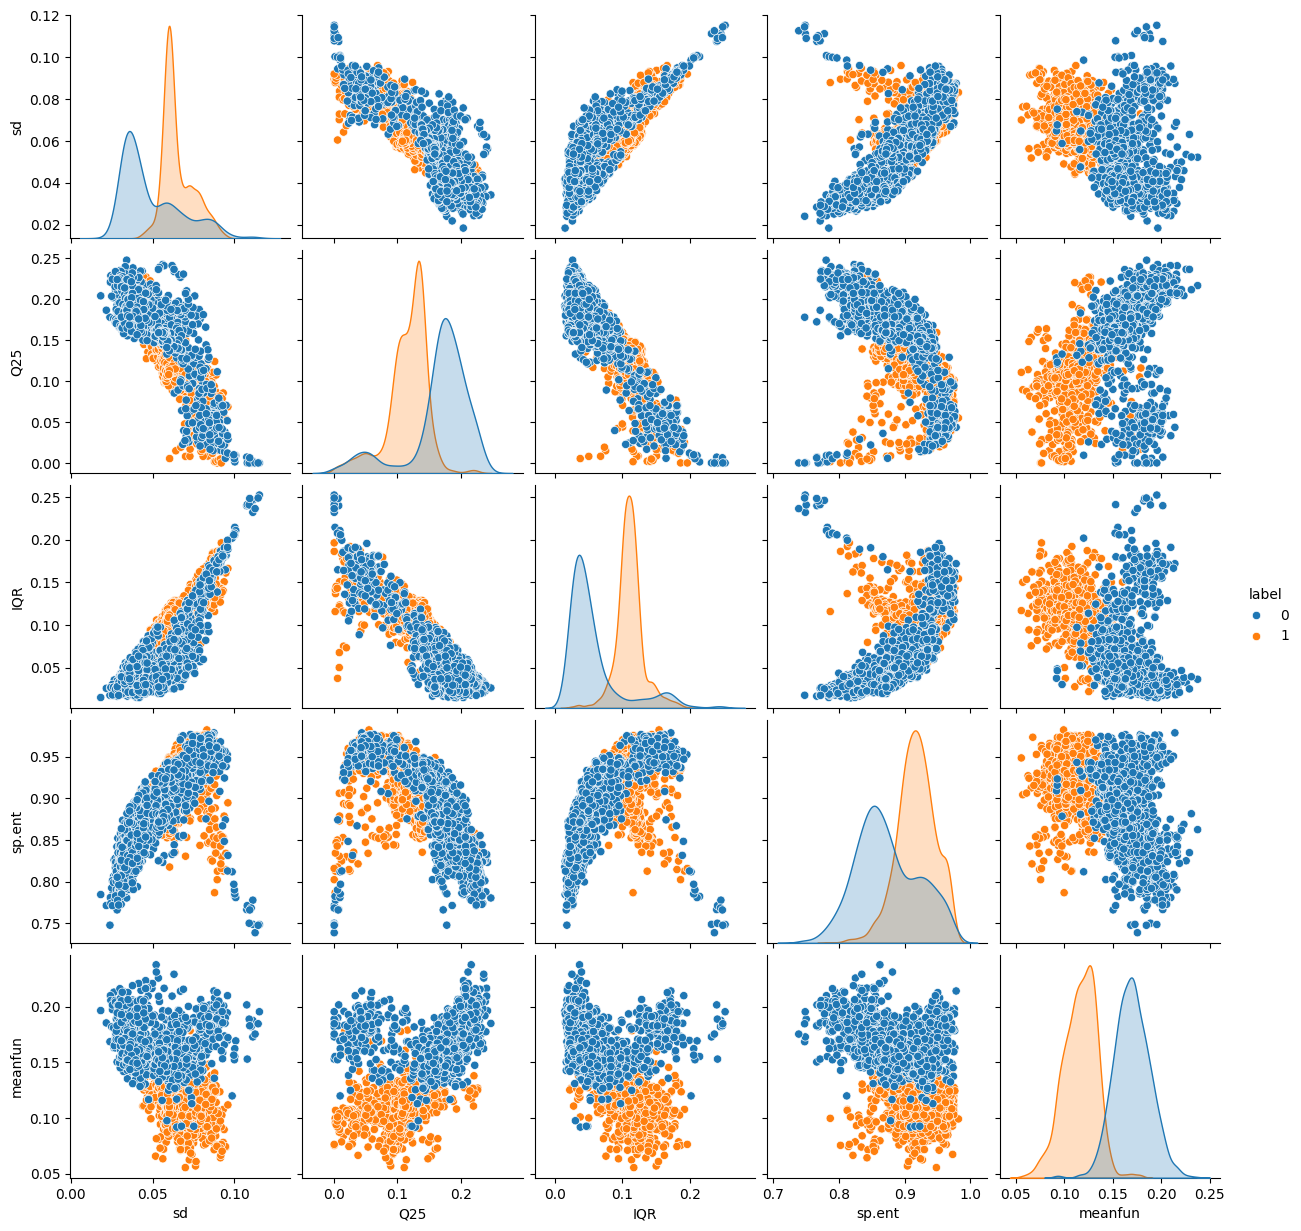

In [16]:
plt.figure(figsize=(20,20))
sb.pairplot(df[top_corelated_values.index], hue='label')

In [17]:
X = df.drop('label', axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
svc=LinearSVC(max_iter=1000000) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score:
0.944794952681388


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
